## 1. Importing required libraries

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import io
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.base import BaseEstimator, TransformerMixin

In [ ]:
pip install ucimlrepo

## 2. Loading the data into a dataframe

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset from https://archive.ics.uci.edu/dataset/1/abalone
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

#combine features and target(s)
df = pd.concat([X, y], axis=1)

#Check if it is loaded
print(df.head())

  Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  


In [ ]:
# Drop column rings, and add age (target) which is rings + 1.5

df['Age'] = df.Rings + 1.5
df = df.drop(columns='Rings')
df.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


## 3. Exploring the data

In [ ]:
# quick summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Age             4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [ ]:
# counts of types of data/ class distribution
df.dtypes.value_counts()

,count
float64,8
object,1


Results:
- 1 categorical column, 8 numeric

In [ ]:
# statistics for every numerical column
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


In [ ]:
# Check for missing values in the entire DataFrame
missing_values = df.isnull().sum()  # Count of null values in each column

# ratio of missing values, in %
missing_ratio = (df.isnull().sum()/df.shape[0])*100

Data is complete with no missing values, do not need to drop any columns.

In [ ]:
# check number of unique values
df.nunique().to_frame("# of unique values")

,# of unique values
Sex,3
Length,134
Diameter,111
Height,51
Whole_weight,2429
Shucked_weight,1515
Viscera_weight,880
Shell_weight,926
Age,28


## 4. Data Visualization

<Axes: >

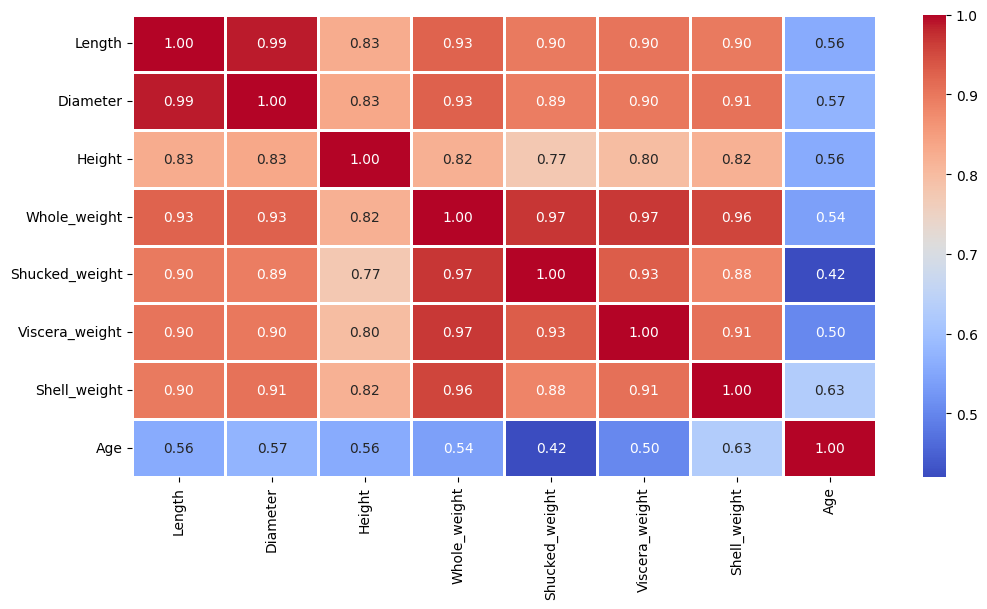

In [ ]:
# Display heatmap that plots correlation matrix between numerical attributes of df
# Selects only numeric columns (int and float) from DataFrame df.
# The result numerical_df excludes categorical columns like category, body, etc

numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numerical_df.corr(),
            cmap = 'coolwarm',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

Results:
- Heatmap shows the r value, which is how closely 2 numbers are correlated
- Blue boxes indicate low correlation between 2 attributes, and can possibly be excluded during pre-processing.
- The closer the colour is to red, the higher the correlation. For example, shucked weight and whole weight have a high positive relationship. It is likely that as shucked weight increase, the whole weight will increase as well.
- Correlation doesn't capture nonlinear relationships and is sensitive to outliers, so we can look at other features to improve the prediction.

array([[<Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Diameter'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Whole_weight'}>,
        <Axes: title={'center': 'Shucked_weight'}>,
        <Axes: title={'center': 'Viscera_weight'}>],
       [<Axes: title={'center': 'Shell_weight'}>,
        <Axes: title={'center': 'Age'}>, <Axes: >]], dtype=object)

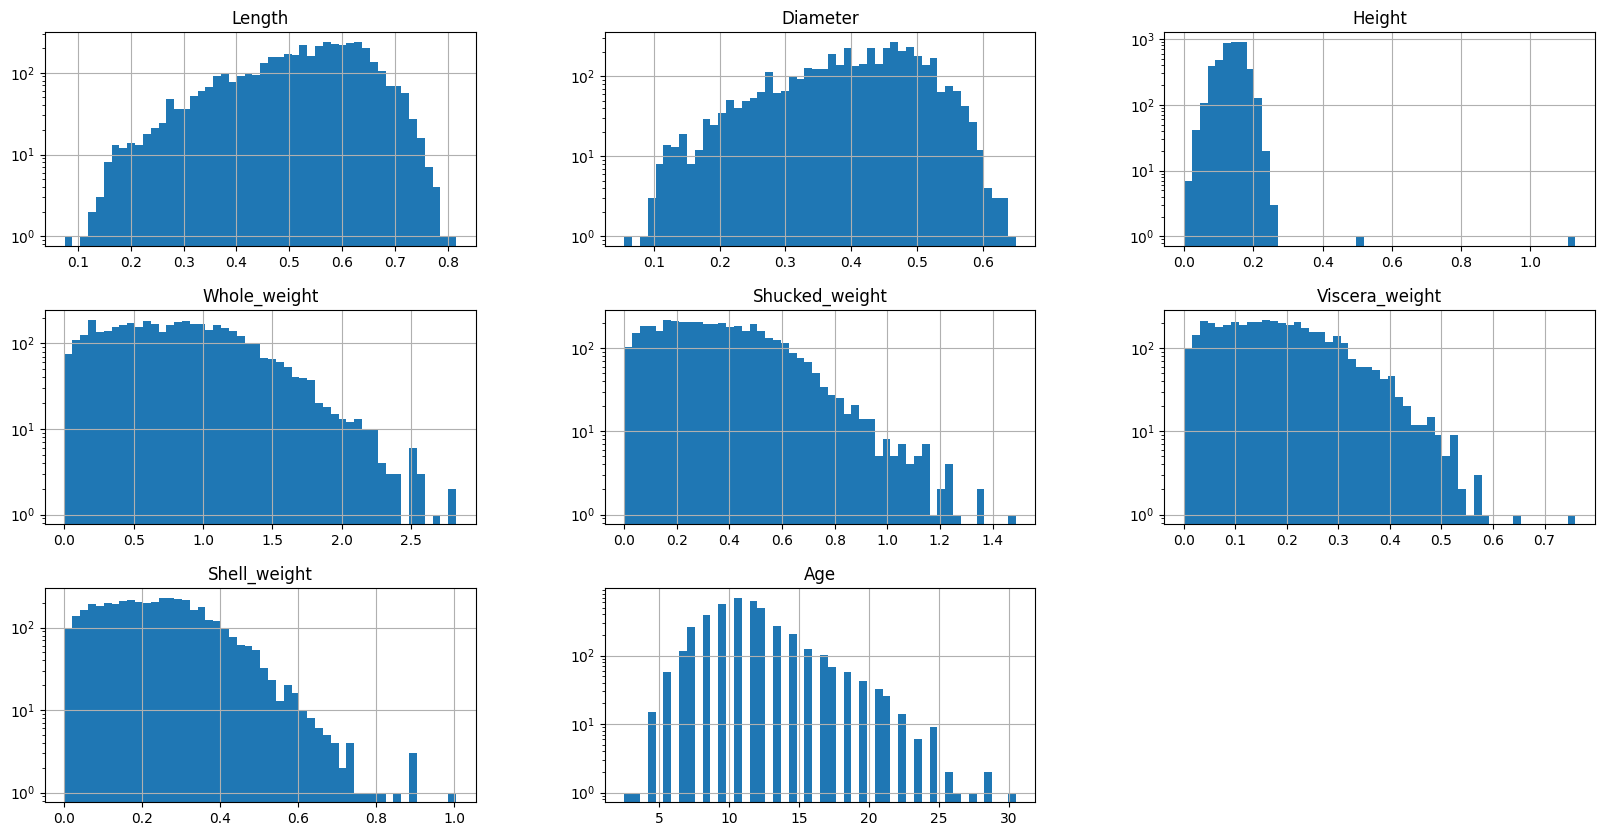

In [ ]:
# Plotting histograms for all numeric columns to check for noise
# Using log to see the small values

df.hist(bins=50, figsize=(20,10), log=True)

Results:

We see that most of the data are normally distributed. We see a potential extreme outlier in height that we will need to remove before training the models.

In [ ]:
outlier_rows = df[df["Height"] > 1]
print(outlier_rows)

     Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
2051   F   0.455     0.355    1.13         0.594           0.332   

      Viscera_weight  Shell_weight  Age  
2051           0.116        0.1335  9.5  


In [ ]:
# drop row by index
df = df.drop(2051)

df.shape[0] #expected 4177 - 1 = 4176

4176

In [ ]:
# check that there are no more outlier rows after removal

outlier_rows = df[df["Height"] > 1]
print(outlier_rows)

Empty DataFrame
Columns: [Sex, Length, Diameter, Height, Whole_weight, Shucked_weight, Viscera_weight, Shell_weight, Age]
Index: []


## 5. Pre-processing the data

In [ ]:
# Preparing data by splitting into training and testing sets using stratified sampling
from sklearn.model_selection import StratifiedShuffleSplit

# bin continuous attribute price
df["age_bin"] = pd.qcut(df["Age"], q=5, labels=False)

# using 20% for testing, and random seed 42 for reproducability
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# .split() generates indices / row numbers
for train_index, test_index in split.split(df, df["age_bin"]):
    strat_train = df.iloc[train_index].copy() #full training set
    strat_test = df.iloc[test_index].copy() #full test set

# drop age_bin
strat_train.drop(columns=["age_bin"], inplace=True)
strat_test.drop(columns=["age_bin"], inplace=True)

# split into features and class
X_train = strat_train.drop(columns=["Age"])
y_train = strat_train["Age"]
X_test = strat_test.drop(columns=["Age"])
y_test = strat_test["Age"]

print("X_train shape:", X_train.shape) # (7998,14) shows 7998 rows, 14 columns
print("X_test shape:", X_test.shape) # (2000,14) shows 2000 rows, 14 columns
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (3340, 8)
X_test shape: (836, 8)
y_train shape: (3340,)
y_test shape: (836,)


In [ ]:
# Create preprocessing pipeline
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# define numerical and categorical attributes in dataset (Excluding target)
num_attributes = ["Length", "Diameter", "Height", "Whole_weight", "Shucked_weight", "Viscera_weight", "Shell_weight"] #numeric column names
cat_attributes = ["Sex"] #categorical column name

# pipeline for numerical attributes
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()) # normalisation using z-score
    ])

# pipeline for categorical attributes
cat_pipeline = Pipeline([
        ('encoder', OneHotEncoder(handle_unknown="ignore", sparse_output=False)) # convert categorical to numeric
    ])

# each branch processes a subset of data
pre_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attributes), #applies to numerics
        ("cat", cat_pipeline, cat_attributes), #applies to categorical
    ])

## Select and train models

In [ ]:
# SGD Linear Regression
# Decision Tree Regressor
# Random Forest Regressor
# run these 3 models on training set
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# build a pipeline with each model
def build_pipeline(model):
    return Pipeline([
        ('preprocessor', pre_pipeline), # preprocessing pipeline
        ('model', model)
    ])

# create instance of model and build pipelines
lr_model = SGDRegressor()
lr_pipeline = build_pipeline(lr_model)

dt_model = DecisionTreeRegressor(random_state=42)
dt_pipeline = build_pipeline(dt_model)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_pipeline = build_pipeline(rf_model)

In [ ]:
# evaluate models on training set using cross validation
# by splitting data into multiple train/ test sets and averaging results
# we get a more reliable estimate of performance
from sklearn.model_selection import cross_val_score

def evaluate_model_custom(model):
  # this function returns evaluation metrics for each model passed in
  model_name = model.named_steps['model'].__class__.__name__
  scores = cross_val_score(model, X_train, y_train, \
                          scoring="neg_mean_squared_error", cv=5)
  #use MSE as evaluation metric, 5-fold cross validation
  rmse_scores = np.sqrt(-scores) #negates negative MSE scores back to positive
  print (f"{model_name} RMSE: {rmse_scores} \n Mean RMSE: {rmse_scores.mean()} \n Standard deviation RMSE: {rmse_scores.std()}")

evaluate_model_custom(lr_pipeline)
evaluate_model_custom(dt_pipeline)
evaluate_model_custom(rf_pipeline)


SGDRegressor RMSE: [2.38636257 2.1448221  2.1538671  2.21781831 2.32489408] 
 Mean RMSE: 2.2455528307804946 
 Standard deviation RMSE: 0.09533580160213792
DecisionTreeRegressor RMSE: [3.10567377 2.97217636 3.00124725 2.8701958  2.91804216] 
 Mean RMSE: 2.973467069499441 
 Standard deviation RMSE: 0.07998611266444666
RandomForestRegressor RMSE: [2.37876987 2.08451792 2.13776305 2.21670407 2.28996571] 
 Mean RMSE: 2.2215441252168757 
 Standard deviation RMSE: 0.10509074642348545


Results:

5 fold cross validation

- RMSE gives us the average difference between model's predicted age and actual age.
- For example, a mean RMSE of 501.559 means the model is off by about $501 on average, per prediction.
- Standard deviation tells us the stability across different cross-validation folds.

- Linear regression: mean 2.23, standard deviation 0.09. This means the model performs well, and predictions are about 2.23 years off from the actual price. Low standard deviation across the 5 folds indicates the model is quite stable, meaning the relationship between age and other features could be accurately captured using linear regression.

- Decision tree: mean 2.97 standard deviation 0.08. This has the highest mean RMSE but lowest standard deviation. The high error implies overfitting to each training fold and poor generalisation. Despite the sligtly smaller standard deviation, this does not compensate for the higher error.

High standard deviation shows the inconsistency of results and also indicates that it overfits on some cross validation folds, while underperforming on some others. This could be because the model is very sensitive to noise or needs pruning.

- Random forest: mean 2.22, standard deviation 0.1. This model performs the best out of all three, with the lowest mean RMSE but highest standard deviation RMSE. By using multiple trees in its model, this helps to reduce overfitting.

- Next, we will tune the random forest by adjusting hyperparameters to improve the results.

## Fine Tune the model

In [ ]:
# fine tuning random forest model
from sklearn.model_selection import GridSearchCV

# choosing hyperparameters
param_grid = {
    'model__n_estimators': [100, 200], # randomforest parameter inside pipeline
    'model__max_depth': [None, 10, 20], # control max depth of tree, to prevent overfitting (Pre-pruning)
}

# initialise GridSearchCV with random forest pipeline
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=3, scoring='neg_root_mean_squared_error')

# fit to training data
grid_search.fit(X_train, y_train)

# print best model and best parameters
print("Best params:", grid_search.best_params_)
print("Best model with best parameters:",grid_search.best_estimator_ ) #returns random forest with best parameters
print("Best RMSE:", -grid_search.best_score_)


Best params: {'model__max_depth': 10, 'model__n_estimators': 200}
Best model with best parameters: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler())]),
                                                  ['Length', 'Diameter',
                                                   'Height', 'Whole_weight',
                                                   'Shucked_weight',
                                                   'Viscera_weight',
                                                   'Shell_weight']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                            

Results:
- Best hyperparameters: adding the new feature add_bed_per_bath enhances model's performance. Using 200 trees in random forest model is better, and we should not restrict the trees depth.
- RMSE of 516 tells us that on average, the predicted price is about 516 dollars off from the actual price.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# further fine tuning by testing the other models and other hyperparameters
models = {
    "Linear Regression": SGDRegressor(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}


# sample range of values for these parameters
min_samples_split_values = np.arange(2, 20)  # from 2 to 19
min_samples_leaf_values = np.arange(1, 20)   # from 1 to 19

# add new hyperparameters
param_grid_new = {
    "Linear Regression": {
        'model__penalty': ['none', 'l2', 'l1', 'elasticnet'], # regularization type
        'model__alpha': [0.0001, 0.001, 0.01], # regularization strength
        'model__learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'], # learning rate schedule
        'model__eta0': [0.01, 0.1, 0.5], # initial learning rate
        'model__tol': [1e-3, 1e-4, 1e-5]  # stopping tolerance
    },
    "Random Forest": {
        'model__criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],   # impurity measures
        'model__n_estimators': [100, 200, 300], # for random forest
        'model__max_depth': [None, 10, 20, 30], # control max depth of tree for DT and RF, to prevent overfitting (Pre-pruning)
        'model__min_samples_split': min_samples_split_values, # min samples to split an internal node
        'model__min_samples_leaf': min_samples_leaf_values # min samples required to be at a leaf node
    },
    "Decision Tree": {
        'model__criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
        'model__max_depth': [None, 10, 20, 30],
        'model__min_samples_split': min_samples_split_values,
        'model__min_samples_leaf': min_samples_leaf_values
    }
}

# grid search which also returns best model
for name, model in models.items():
    pipeline = build_pipeline(model) # build pipeline for model
    param_grid = param_grid_new[name] # get correct grid for model

    grid_search_new = RandomizedSearchCV(pipeline, param_grid, cv=3, scoring='neg_root_mean_squared_error')

    # fit to training data
    grid_search_new.fit(X_train, y_train)

    # print best model and best parameters
    print("Best params:", grid_search_new.best_params_)
    print("Best model:", grid_search_new.best_estimator_)
    print("Best RMSE:", -grid_search_new.best_score_)

    # extract and print all results as a dataframe
    results = pd.DataFrame(grid_search_new.cv_results_)

    # show only relevant columns and print all RMSEs
    display_cols = [col for col in results.columns if 'param_' in col or 'mean_test_score' in col]
    results_display = results[display_cols].copy()
    results_display['mean_test_RMSE'] = -results_display['mean_test_score']

    print("\nAll RMSEs for each parameter combination:")
    print(results_display.sort_values('mean_test_RMSE'))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
12 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/loca

Best params: {'model__tol': 1e-05, 'model__penalty': 'elasticnet', 'model__learning_rate': 'adaptive', 'model__eta0': 0.01, 'model__alpha': 0.001}
Best model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('std_scaler',
                                                                   StandardScaler())]),
                                                  ['Length', 'Diameter',
                                                   'Height', 'Whole_weight',
                                                   'Shucked_weight',
                                                   'Viscera_weight',
                                                   'Shell_weight']),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_un

Results:
- We evaluate based on RMSE, where lower means better performance.
- **Linear regression:** best RMSE is 574 with parameters: {'model__positive': False, 'bed_per_bath_adder__add_bed_per_bath': True}. Best model does not require positive coefficients, and adding the attribute bed_per_bath helps to improve results. We see that when positive=True, the mean_test_RMSE is extremely large, suggesting instability if we add this constraint.
- Previously, we had an error where some runs failed due to a sparse matrix issue. Accordingly, we added 'spare_output=False' for our One Hot Encoding to prevent the error from occuring again.
- **Decision tree:** best RMSE is 632 with parameters:  {'model__min_samples_split': np.int64(18), 'model__min_samples_leaf': np.int64(7), 'model__max_depth': 30, 'bed_per_bath_adder__add_bed_per_bath': True}.
The tree is best pre-pruned with max depth of 40, minimum 18 samples for node to be split, leaf node to contain at least 7 data points, and to add the bed_per_bath attribute. The RMSE is still slightly higher than linear regression and random forest.
- **Random forest:** best RMSE is 537 with parameters: {'model__n_estimators': 300, 'model__min_samples_split': np.int64(3), 'model__min_samples_leaf': np.int64(4), 'model__max_depth': 20, 'bed_per_bath_adder__add_bed_per_bath': False}. This has the best RMSE and thus performance across all three models still. The best parameters are for the tree to be pre-pruned with max depth of 20 while having 300 trees, min_samples_split of 3, min_samples_leaf of 4, and to exclude the bed_per_bath attribute. This could mean the model is able to learn this attribute on its own without manual creation of the attribute. Also, the trees are shallow, but there are many of them.
- Overall, decision tree is still the weakest with the highest RMSE. While linear relationship has a decent RMSE, it assumes a linear relationship between inputs and price, which may not be realistic when predicting. Random forest is the best model which is able to handle non-linear relationships (unlike linear regression), many categorical variables (emerging from the one-hot encoding done earlier), and it is able to derive interactions between features like the bed_per_bath attribute. By averaging across 100 trees, this helps to average results, preventing overfitting, and reducing variance from any one feature dominating.


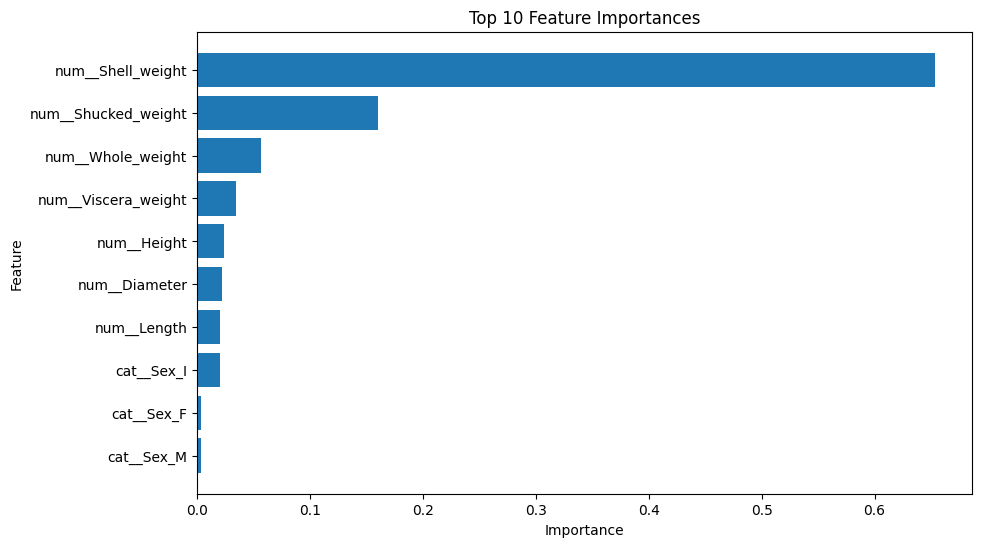

In [ ]:
# feature importance
# shows the relative importance of each feature used by the model. higher value = more important feature which
# contributed more to model's decisions

# extract feature importances from randomforest model (best one from gridsearchCV above)
best_rf = grid_search_new.best_estimator_
importances = best_rf.named_steps['model'].feature_importances_
feature_names = best_rf.named_steps['preprocessor'].get_feature_names_out() #feature names

# get top 10 feature importances (ascending order)
top_indices = np.argsort(importances)[-10:]
top_features = feature_names[top_indices]
top_importances = importances[top_indices]

# plot bar graph
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_importances)
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


Results:
- Top 10 features which contribute to making accurate predictions.
- Square footage of room is the strongest predictor of rental price, almost at 0.40. Larger places usually cost more.
- Next, is the state of California. Properties in California have a strong influence on price, i.e. location plays a big role in pricing/ demand.
- Third would be the longitude, which corresponds to the geographic regions.
- Thus, square footage is the key predictor of price, while geographic location (state) is also important. Number of bathrooms, time, and bedrooms have lesser importance.

## Evaluate the outcomes

In [ ]:
# evaluate on test set
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# best model with best hyperparameters
final_model = grid_search_new.best_estimator_

# train on data set again
# no need to manually preprocess the test set as its final_model pipeline already includes it
final_model.fit(X_train, y_train)

# predict price for X_test
final_predictions = final_model.predict(X_test)

# evaluation scores
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_mae = mean_absolute_error(y_test, final_predictions)
final_r2 = r2_score(y_test, final_predictions)

print("Final RMSE on Test Set:", final_rmse)
print("Final MAE on Test Set:", final_mae)
print("Final R-squared on Test Set:", final_r2)


Final RMSE on Test Set: 1.9992458533350805
Final MAE on Test Set: 1.418154448186603
Final R-squared on Test Set: 0.5980841221889321


- Using our final model on the test set tells us how well it generalises to unseen data.
- Final RMSE tells us that our predictions are about 492 off in price.
- Mean absolute error of 265 tells us the average absolute error between predicted and actual prices, i.e. predictions are about 265 off in either direction.
- R-squared explains about 69.4% of the variation in prices, which is reasonable especially for housing prices which could be affected by many variables.

- Comparing this against our training results (cross-validation scores) earlier, our test RMSE (491.03) is slightly better than train RMSE (511.64), which indicates better performance. This shows that the model is generalising well to unseen data and is not overfitting.

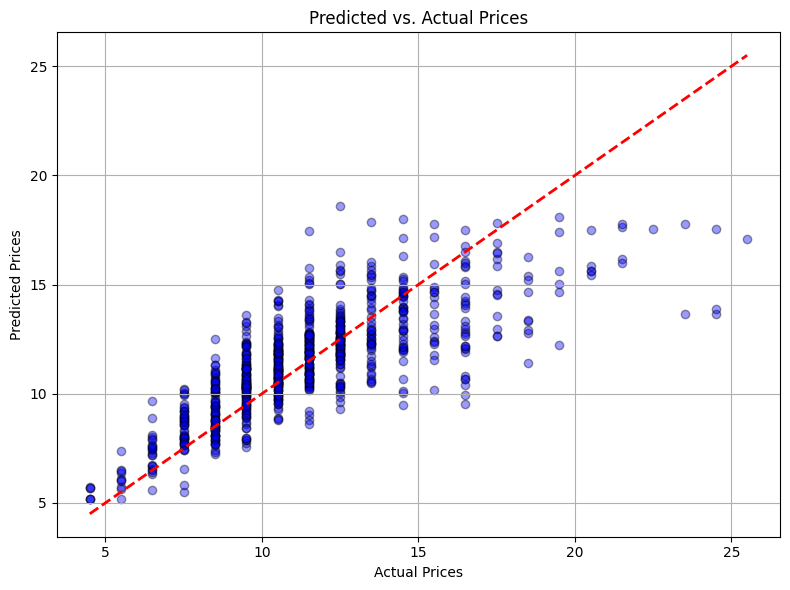

In [ ]:
# visualise predicted vs actual results

# create dataframe for actual vs predicted results
df_results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': final_predictions
})

plt.figure(figsize=(8, 6))
plt.scatter(df_results['Actual'], df_results['Predicted'], alpha=0.4, color='blue', edgecolor='k')

# plot ideal line
plt.plot([df_results['Actual'].min(), df_results['Actual'].max()],
         [df_results['Actual'].min(), df_results['Actual'].max()],
         'r--', lw=2)

# labels and title
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs. Actual Prices')
plt.grid(True)
plt.tight_layout()
plt.show()


Results:
- Each blue dot represents one prediction
- Red dashed line represents where predicted values = actual values. If point lies on this, model predicted accurately. The closer the dots are to the line, the more reliable our model is.
- Most predictions are close to the line. Overall, the accuracy is good. However, spread increases with price. Above $4000, predicted prices seem to be more scattered away from the red line, which suggests less accurate results and higher variance in predicting more expensive listings. This could be because our data set consisted of properties which were cheaper, and there was limited training examples on the expensive listings for our model to learn from. As such, we have underprediction of prices for some expensive houses (e.g. predicting about 3800 for a house which is actually priced at 1100). For future purposes, we can consider applying a log function on prices to stabilise the variance.
- There are no major signs of overfitting like curves or patterns, which matches our earlier results on test RMSE being close to cross-validated RMSE for random forest.



In [ ]:
# confusion matrix not applicable for regression problems